# Gradient Descent for Linear Regression

In machine learning, gradient descent is an optimization algorithm commonly used to minimize the cost or loss function in various models, including linear regression. The goal of gradient descent is to iteratively update the model's parameters to find the optimal values that minimize the difference between the predicted and actual values.

## Linear Regression Model

In linear regression, we aim to find the best-fitting line that represents the relationship between the input variable \(x\) and the output variable \(y\). The linear regression model can be defined as:

$$
y = mx + b
$$

where \(m\) represents the slope or coefficient of \(x\), and \(b\) represents the y-intercept.

## Cost Function

The cost function quantifies the error between the predicted values and the actual values. In linear regression, the commonly used cost function is often denoted as \(L\) and defined as:

$$
L(m, b) = \frac{1}{2n} \sum_{i=1}^{n}(y_{\text{pred}}^{(i)} - y^{(i)})^2
$$

where $n$ is the number of data points, $y_{\text{pred}}^{(i)}$ is the predicted value for the $i$-th data point, and $y^{(i)}$ is the actual value for the $i$-th data point.

## Gradient Descent Algorithm

Gradient descent aims to find the values of $m$ and $b$ that minimize the cost function $L(m, b)$. It does so by iteratively updating the parameters in the opposite direction of the gradient of the cost function. The steps involved in gradient descent are as follows:

1. Initialize the values of $m$ and $b$ with random or predefined values.
2. Calculate the predicted values $y_{\text{pred}}$ using the current values of $m$ and $b$.
3. Compute the gradients of the cost function with respect to $m$ and $b$ using partial derivatives:

$$
\frac{\partial L}{\partial m} = \frac{1}{n} \sum_{i=1}^{n} x^{(i)}(y_{\text{pred}}^{(i)} - y^{(i)})
$$

$$
\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred}}^{(i)} - y^{(i)})
$$

4. Update the values of $m$ and $b$ using the gradients and the learning rate $\lambda$:

$$
m := m - \lambda \frac{\partial L}{\partial m}
$$

$$
b := b - \lambda \frac{\partial L}{\partial b}
$$

[//]: # (where $\text{:=}$ denotes the assignment operation.)

5. Repeat steps 2 to 4 until convergence or a maximum number of iterations is reached.

The learning rate $\lambda$ determines the step size in each iteration. It should be carefully chosen, as a too small value may result in slow convergence, while a too large value may cause overshooting the minimum.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

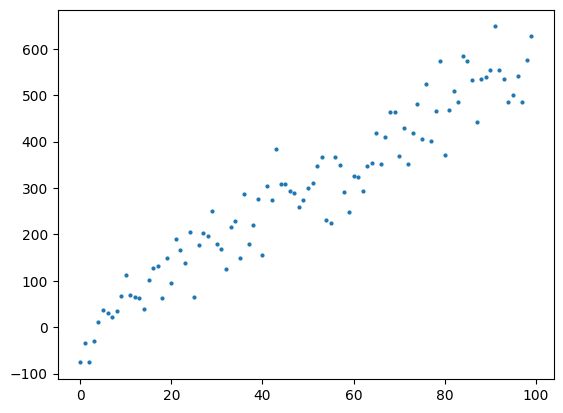

In [2]:
# Let us create some random data
data_size = 100

mu, sigma = 1, 50  # mean and standard deviation
error = np.random.normal(mu, sigma, data_size)

x = np.arange(0, data_size)
y = (6 * x) + error

plt.plot(x, y, "o", markersize=2)

plt.show()

In [3]:
# This is needed to display the animation in the Visual Studio Code Notebook
%matplotlib ipympl 
plt.rcParams['animation.html'] = 'jshtml'

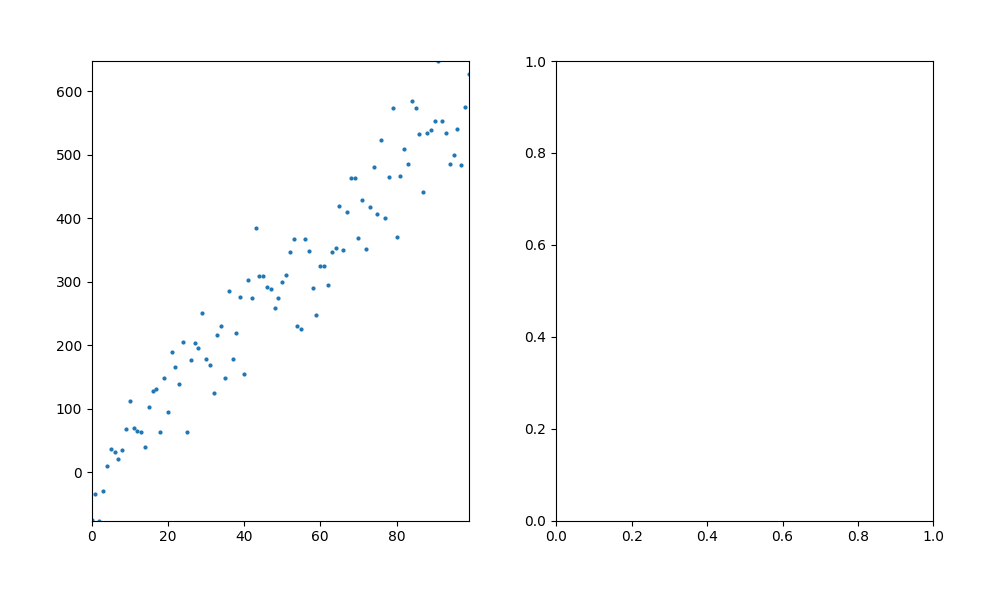

In [4]:
# Plot the data points.
fig = plt.figure(figsize=(10, 6), dpi=100, facecolor="w", edgecolor="k")
ax1 = plt.subplot(1, 2, 1)
ax1.set_xlim(left=np.min(x), right=np.max(x))
ax1.set_ylim(bottom=np.min(y), top=np.max(y))
ax1.plot(x, y, "o", markersize=2)
# second sub-figure
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)
plt.tight_layout(pad=4.0)

# Run Animation

In [5]:
# Initialize the regression coefficients with zero
b_current = 0
m_current = 0
learningRate = 0.00001  # Set the learning rate
num_iteration = 100  # Set the number of iteration
precision = 0.1  # Set the precision
previous_step_size = 1  # Set an initial step size
n = float(len(y))  # Number of samples in our dataset as float for division
oldCost = 0  # We initialize the old cost to zero

# This part is for initializtion of the visualization
xx, costHist = [], []  # Create two empty lists for visualization
y_prediction = m_current * x + b_current  # The current predicted value of Y
initCost = (1 / n) * sum(
    (y_prediction - y) ** 2
)  # We compute costs just for visualization limits
# Set the limits for the visualization plot based on the initial cost.
ax2.set_xlim(left=0, right=num_iteration)
ax2.set_ylim(bottom=0, top=initCost)

# Let's start with main iterative part of gradient descent algorithm
for i in range(num_iteration):
    # Calculate the prediction with current regression coefficients.
    y_prediction = m_current * x + b_current
    # Calculate the cost with current regression coefficients.
    cost = (1 / n) * sum((y_prediction - y) ** 2)
    # Calculate the gradients for m and b.
    m_gradient = (1.0 / n) * sum(x * (y_prediction - y))
    b_gradient = (1.0 / n) * sum(y_prediction - y)
    # Update the regression coefficients with the gradients.
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    # Check if reach the predefined precision
    if abs(cost - oldCost) <= precision:
        print("Stoped at iteration", i)
        break
    oldCost = cost

    # Visualization
    # Update the regression line.
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals + b_current
    # Clear the previous line and points
    ax1.clear()
    # Set the limits for the visualization plot based on the current cost.
    ax1.set_xlim(left=np.min(x), right=np.max(x))
    ax1.set_ylim(bottom=np.min(y), top=np.max(y))
    # Plot the data points
    ax1.plot(x, y, "o", markersize=2)
    ax1.plot(x_vals, y_vals, "-", color="red", linewidth=2.0)
    # Update the cost plot
    xx.append(i)
    costHist.append(cost)
    ax2.plot(xx, costHist, color="blue")
    # plot values of m_current and b_current on ax2 
    fig.canvas.draw()
    # Print the current state of the algorithm for each 10 iterations
    if i % 10 == 0:
        print("Iteration No.=", i, " m = ", m_current, " b=", b_current, " Cost=", cost)

# Print the final parameters of the regression model
print("m = ", m_current, " b=", b_current)

Iteration No.= 0  m =  0.1941068802061445  b= 0.0029231483445256  Cost= 117306.32185912816
Iteration No.= 10  m =  1.8169313501568545  b= 0.02735660826785563  Cost= 61400.67264393815
Iteration No.= 20  m =  2.979032168625705  b= 0.04484394962948498  Cost= 32732.49359375373
Iteration No.= 30  m =  3.8112098949178788  b= 0.05735719253268247  Cost= 18031.573348986254
Iteration No.= 40  m =  4.407130493099111  b= 0.06630849580238041  Cost= 10493.003989072455
Iteration No.= 50  m =  4.833867933425861  b= 0.07270910295659624  Cost= 6627.257687171475
Iteration No.= 60  m =  5.139453723723173  b= 0.07728316303202137  Cost= 4644.919421589879
Iteration No.= 70  m =  5.358283110539401  b= 0.08054923740185241  Cost= 3628.3847831486028
Iteration No.= 80  m =  5.51498644671358  b= 0.08287866661084646  Cost= 3107.1101352193937
Iteration No.= 90  m =  5.627201468324231  b= 0.08453736672469425  Cost= 2839.8027030983667
m =  5.700675701533409  b= 0.08561530187543824
